In [ ]:
#external imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


#internal imports
from datetime import datetime

# Data Inspection and Cleaning

Inspecting the data fro Drifter273:

In [ ]:
data = pd.read_csv('/home/camilla/Documents/MIR_2023/OCEANOGRAPHY/sea_trial_analysis/drifters_data/LCI00273.txt')
data = data.drop(columns=['Speed (m/s)', 'Status', 'Course (°)', 'Battery (V)'])


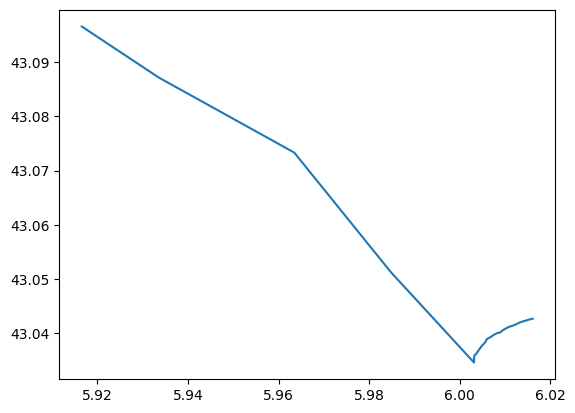

In [ ]:
plt.plot(data['Longitude (°)'], data['Latitude (°)'])

Cleaning the data:

In [ ]:
cleaned273 = data[18:]
cleaned273 = cleaned273.reset_index()

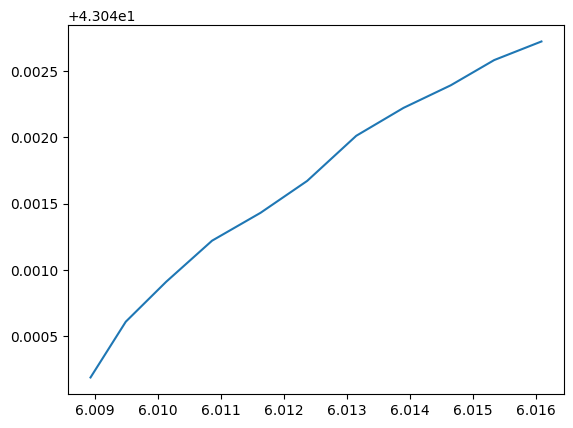

In [ ]:
plt.plot(cleaned273['Longitude (°)'], cleaned273['Latitude (°)'])

Cleaning the data for the other two drifters:

In [ ]:
data386 = pd.read_csv('/home/camilla/Documents/MIR_2023/OCEANOGRAPHY/sea_trial_analysis/drifters_data/LCF00386.txt')
data386 = data386.drop(columns=['Speed (m/s)', 'Status', 'Course (°)'])
cleaned386 = data386[11:26]
cleaned386 = cleaned386.reset_index()
data384 = pd.read_csv('/home/camilla/Documents/MIR_2023/OCEANOGRAPHY/sea_trial_analysis/drifters_data/LCF00384.txt')
data384 = data384.drop(columns=['Speed (m/s)', 'Status', 'Course (°)'])
cleaned384 = data384[16:23]
cleaned384 = cleaned384.reset_index()

Save the cleaned data:

In [ ]:
cleaned273.to_csv('drifters_data/cleaned_273.csv', sep='\t')
cleaned384.to_csv('drifters_data/cleaned_384.csv', sep='\t')
cleaned386.to_csv('drifters_data/cleaned_386.csv', sep='\t')

In [ ]:
print(len(cleaned273))
print(len(cleaned384))
print(len(cleaned386))

11
7
15


# Plotting the trajectories

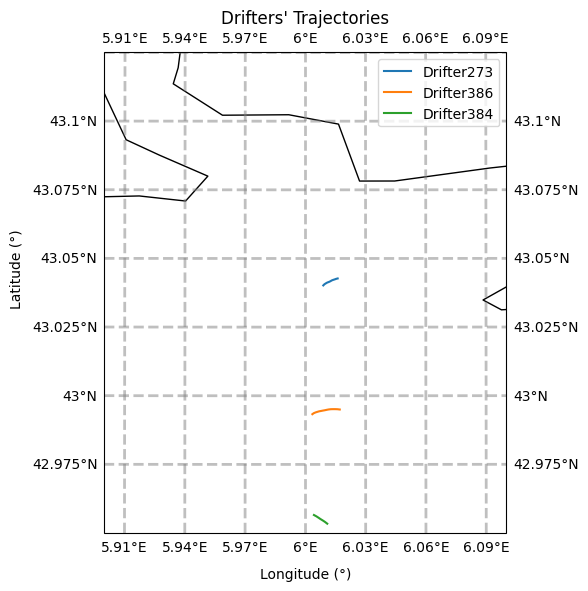

In [ ]:
central_lat = 43.04
central_lon = 5.59
extent = [5.9, 6.1, 42.95, 43.125]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.plot(cleaned273['Longitude (°)'], cleaned273['Latitude (°)'], transform=ccrs.Geodetic(), label = "Drifter273")
ax.plot(cleaned386['Longitude (°)'], cleaned386['Latitude (°)'], transform=ccrs.Geodetic(), label = "Drifter386")
ax.plot(cleaned384['Longitude (°)'], cleaned384['Latitude (°)'], transform=ccrs.Geodetic(), label = "Drifter384")
ax.gridlines(draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.text(-0.2, 0.55, 'Latitude (°)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude (°)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
ax.set_title("Drifters' Trajectories")
ax.coastlines()
ax.legend()
plt.tight_layout()
plt.savefig('Figures/drifters_geo_located.png')

# Calculating the velocities

In [ ]:
#code for calculating velocity
def dist_in_km(lat1,lat2,lon1,lon2):
    D = 6371*100000   #6371 is the radius of earth
    dist = np.arccos(np.sin(np.radians(lat1))*np.sin(np.radians(lat2))
                     +np.cos(np.radians(lat1))*np.cos(np.radians(lat2))*np.cos(np.radians(lon2)-np.radians(lon1)))*D
    return dist

def duration(data):
    # standard date and time format
    date_format = '%Y-%m-%d %H:%M:%S'
    date_list = []

    for date_data in data['Position time (UTC)']:
        date_obj = datetime.strptime(date_data, date_format)
        date_list.append(date_obj)
    return date_list

def vel(data, date_list):
    velocity = []
    times = []
    total_time = 0
    for i in range(len(data)-1):
        distance = dist_in_km(data['Latitude (°)'][i],
                             data['Latitude (°)'][i+1],
                             data['Longitude (°)'][i],
                             data['Longitude (°)'][i+1])
        # if i == stop_index:
        #     break
        time = (date_list[i+1] - date_list[i]).total_seconds()
        total_time += time
        times.append(total_time)
        if time != 0:  # Avoid division by zero
            speed = distance / time
            velocity.append(speed)
    return velocity, times
date_list273 = duration(cleaned273)
velocity273, time273 = vel(cleaned273, date_list273)

date_list384= duration(cleaned384)
velocity384, time384 = vel(cleaned384, date_list384)

date_list386 = duration(cleaned386)
velocity386, time386 = vel(cleaned386, date_list386)

# Plotting the velocities alongside trajectories

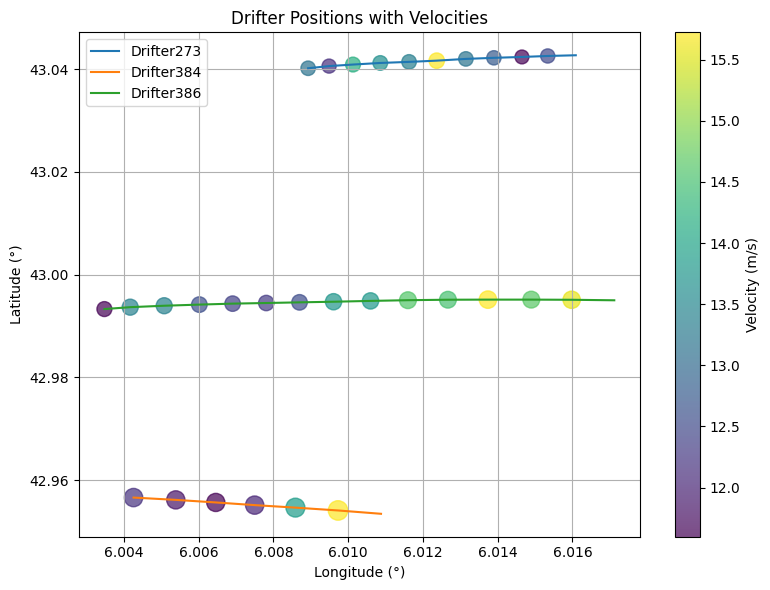

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 6))
datasets = [cleaned273, cleaned384, cleaned386]
velocities = [velocity273, velocity384, velocity386]
names = ['Drifter273','Drifter384','Drifter386']
# Plotting longitude and latitude positions
for data, velocity, name in zip(datasets, velocities, names):
    plt.plot(data['Longitude (°)'], data['Latitude (°)'], label = name)
    plt.scatter(data['Longitude (°)'][:len(data) - 1], data['Latitude (°)'][:len(data) - 1],
                 s=np.array(velocity)*10, c=np.array(velocity), cmap='viridis', alpha=0.7)
plt.colorbar(label='Velocity (m/s)')
plt.title('Drifter Positions with Velocities')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.legend()
plt.grid(True)

plt.tight_layout()

# Display the plot
plt.show()
plt.savefig('Figures/drifters_velocities.png')

A close-up view of the shape of the respective drifter trajectories.

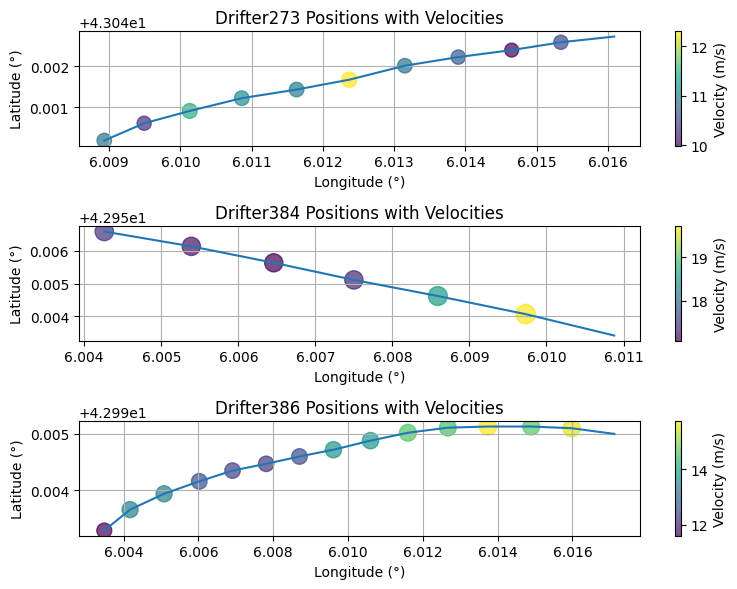

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 6))
datasets = [cleaned273, cleaned384, cleaned386]
velocities = [velocity273, velocity384, velocity386]
names = ['Drifter273','Drifter384','Drifter386']
# Plotting longitude and latitude positions
i = 1
for data, velocity, name in zip(datasets, velocities, names):
    plt.subplot(3,1,i)
    plt.plot(data['Longitude (°)'], data['Latitude (°)'])
    plt.scatter(data['Longitude (°)'][:len(data) - 1], data['Latitude (°)'][:len(data) - 1],
                 s=np.array(velocity)*10, c=np.array(velocity), cmap='viridis', alpha=0.7)
    plt.colorbar(label='Velocity (m/s)')
    plt.title(f'{name} Positions with Velocities')
    plt.xlabel('Longitude (°)')
    plt.ylabel('Latitude (°)')
    plt.grid(True)
    i+=1
    plt.tight_layout()

# Display the plot
plt.show()
plt.savefig('Figures/drifters_velocities_sep.png')